<a href="https://colab.research.google.com/github/daljit3/DFE5/blob/main/Airlines_Cluster_slides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset1 = pd.read_csv('AirlinesCluster.csv')

### Data Understanding

In [ ]:
# peeking at the dataset
dataset1.head().T

,0,1,2,3,4
Balance,28143,19244,41354,14776,97752
QualMiles,0,0,0,0,0
BonusMiles,174,215,4123,500,43300
BonusTrans,1,2,4,1,26
FlightMiles,0,0,0,0,2077
FlightTrans,0,0,0,0,4
DaysSinceEnroll,7000,6968,7034,6952,6935


In [ ]:
#Descriptive stats of the variables in data
dataset1.describe()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


- Balance = number of miles eligible for award travel
- QualMiles = number of miles qualifying for TopFlight status
- BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
- BonusTrans = number of non-flight bonus transactions in the past 12 months
- FlightMiles = number of flight miles in the past 12 months
- FlightTrans = number of flight transactions in the past 12 months
- DaysSinceEnroll = number of days since enrolled in the frequent flyer program

### Data Preparation - Feature Scaling

- Algorithm Families:
    - linear and logistic regression
    - nearest neighbors
    - neural networks
    - support vector machines with radial bias kernel functions
    - principal components analysis
    - linear discriminant analysis

### Pre-processing functions:

- MinMaxScaler
    - Use first unless have theoretical reason to need stronger medicine.
    - Preserves the shape of the original distribution.
    - Doesn't reduce the importance of outliers. 
    - Least disruptive to the information in the original data. 
    - Default range for MinMaxScaler is 0 to 1. 

- RobustScaler
    - Use if have outliers and don't want them to have much influence. 
    - Outliers have less influence than with MinMaxScaler. 
    - Range is larger than MinMaxScaler or StandardScaler.

- StandardScaler
    - When need to transform a feature so it is close to normally distributed.
    - Results in a distribution with a standard deviation equal to 1 (and variance equal to 1). 
    - If you have outliers in your feature (column), normalizing your data will scale most of the data to a small interval. 

- Normalizer
    - Normalizes each sample observation (row), not the feature (column)!

In [ ]:
#standardize the data to normal distribution
from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(dataset1)
dataset1_standardized = pd.DataFrame(dataset1_standardized)

### Find the appropriate cluster number

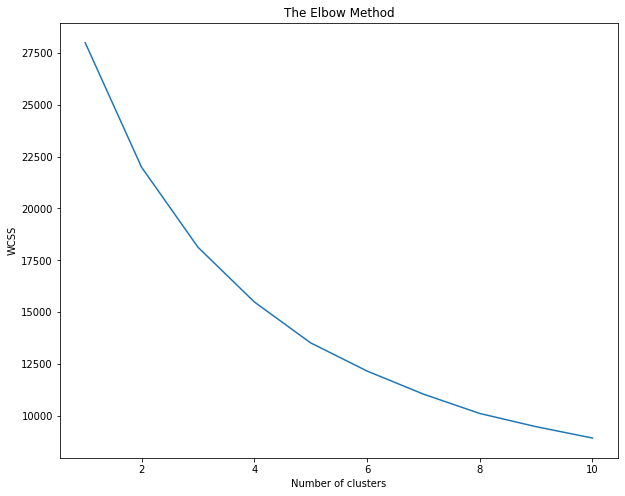

In [ ]:
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
#Within-Cluster-Sum-of-Squares = sum of distances of observations from their cluster centroids
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### K Means Clustering

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(dataset1_standardized)
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
dataset1['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(dataset1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
cluster,,,,,,,
1,152724.4,77.9,50999.4,21.3,479.4,1.5,4912.2
2,116472.4,5636.3,19804.3,12.5,963.0,2.9,3950.6
3,57410.4,53.4,8738.5,9.1,213.4,0.6,5828.1
4,191736.3,471.6,33093.3,28.4,5763.1,16.8,4666.4
5,38180.1,39.4,6734.2,7.6,180.0,0.6,2283.7


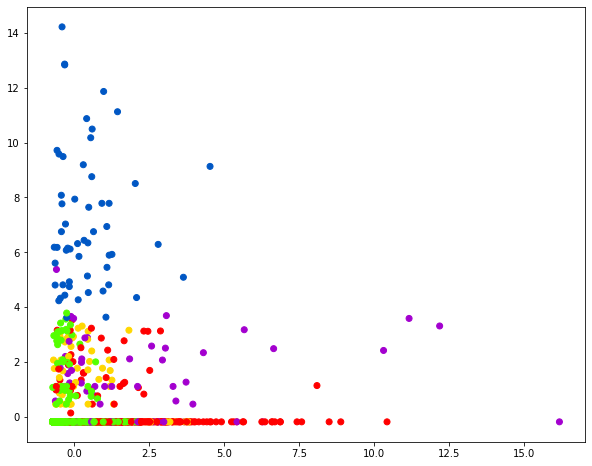

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(dataset1_standardized.iloc[:,0], dataset1_standardized.iloc[:,1], c=y_kmeans.astype(float), cmap='prism')

### Insights and Plan of Action:

- Cluster 5 is set of the recently acquired customer group as the Days since enrollment is lowest , moreover their flight transactions in last 12 months as well as the qualified miles for top class travel is the lowest.
- Cluster 3 is the set of high vintage customers who have highest number of non-flight bonus transaction miles and highest miles eligible for award travel
- Cluster 4 is also high vintage customers however their number of flight miles and flight transactions in last 12 months is alarmingly low, they may churn unless some intervention is done. Bespoke offers to activate these customers is necessary
- Cluster 2 is group of customers who have done highest number of flight transactions and acquired flight miles in last 12 months. Investigate further and identify their needs. For Eg: They may be baby boomers generation who have begun to travel around after their retirement etc.